# Colab setup
Clone the repo into our colab notebook

In [ ]:
!git clone https://github.com/pmozil/EDA_team_21.git
%cd EDA_team_21

# Twitch streamer popularity by language
We obviously begin by importing pandas/reading the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')
df.rename(columns = {'Watch time(Minutes)': 'Wtime'}, inplace = True)

## Relation between follower count and watch time
The relation may be linear, as it followers quite obviously relate to view time

*The relation between the verage viewer count and the view time should be linear*

In [ ]:
x_axis = df["Followers"]
y_axis = df["Wtime"]
reg = np.polyfit(x_axis, y_axis, 1)
linear_func = np.poly1d(reg)

Let's do a quadratic function while we're at it

In [ ]:
coeffs = np.polyfit(x_axis, y_axis, 2)
# create a quadratic function for the coefficients
def quadratic_func(x):
  return x**2*coeffs[0] + x*coeffs[1] + coeffs[2]

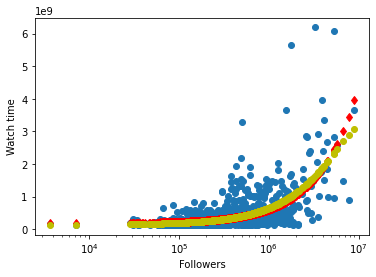

In [ ]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, linear_func(x_axis), 'rd')
plt.plot(x_axis, quadratic_func(x_axis), 'yo')
plt.xlabel("Followers")
plt.ylabel("Watch time")
# Set logarithmic scale, too many dots at the start
plt.xscale('log')
plt.show()

For small follower counts, the function is rather precise. For obvious reasons, we are interested in small follower counts.

**Note that the follower count is small only relatively. It is still very big, as we only have the top 1000 streamers**

It is obvious that the functions are very imprecise, as they are crude approximations, but it is fine in our case.

Also, note the anomalies on the right side of the graph: there are streamers, whose view time if much bigger than it should be, if looking at their follower count. It is because many popular streamers have much more active viewers that subscribers. 

For this reason, we shall also explore th relation between the viewer and follower count.

## How does the eviewer count relate to the follower count? 

In [ ]:
x_axis = df["Followers"]
y_axis = df["Average viewers"]
reg = np.polyfit(x_axis, y_axis, 1)
linear_func = np.poly1d(reg)

In [ ]:
coeffs = np.polyfit(x_axis, y_axis, 2)
# create a quadratic function for the coefficients
def quadratic_func(x):
  return x**2*coeffs[0] + x*coeffs[1] + coeffs[2]

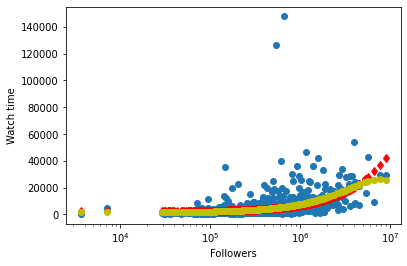

In [ ]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, linear_func(x_axis), 'rd')
plt.plot(x_axis, quadratic_func(x_axis), 'yo')
plt.xlabel("Followers")
plt.ylabel("Watch time")
# Set logarithmic scale, too many dots at the start
plt.xscale('log')
plt.show()

The anomalies here are much better visible than in the case of followers/wiew time, as there certainly are a couple streamers who are very popular with viewers, but not subscribers (and that is the most popular ones)

Since we've already touche the viewer count/view time relation, we shall plot it too

In [ ]:
sns.catplot(data=df, x="Followers", y="Wtime", kind="bar")

In [ ]:
sns.catplot(data=df, x="Followers", y="Language", kind="bar")